In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_inputs = 1
n_neurons = 100
n_steps = 200
n_outputs = 1

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_outputs])

In [4]:
def get_next_batch(batch_size, n_steps):
    X = []
    #get random consecutive points and calculate sin of them
    starting = np.random.rand(batch_size, 1)
    for i in range(n_steps):
        X.append(np.sin(starting + (i/10)))
    y = X.copy()
    y.pop(0)
    y.append(np.sin(starting + n_steps / 10))
    y_np = np.asarray(y)
    X_np = np.asarray(X)
    return X_np.reshape(-1, n_steps, 1), y_np.reshape(-1, n_steps, 1)

In [15]:
def get_test_batch(n_steps):
    X = []
    X_actual = [] #same as x but bigger because covers test domain
    #get random consecutive points
    starting = np.random.rand(1)
    for i in range(n_steps + 100):
        if(i >= n_steps):
            X_actual.append(starting + (i/10))
        else:
            X.append(starting + (i/10))
            X_actual.append(starting + (i/10))
    X_np = np.asarray(X)
    X_actual_np = np.asarray(X_actual)
    return X_np, X_actual_np

In [6]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
    output_size=n_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [7]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
saver = tf.train.Saver()

In [11]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for i in range(n_iterations):
        X_batch, y_batch = get_next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if i % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(mse)
    saver.save(sess, "./sin-one-input-model")

0.36253822
0.01479904
0.0058471183
0.0049652504
0.004866936
0.004866629
0.004890302
0.0047934996
0.0044998564
0.004541366
0.004848846
0.004601733
0.0048026657
0.0049453955
0.0048878216


INFO:tensorflow:Restoring parameters from ./sin-one-input-model


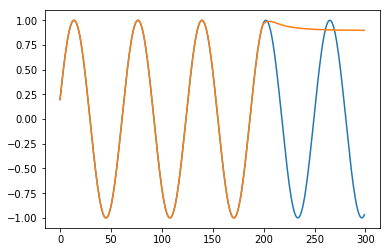

In [17]:
with tf.Session() as sess:
    saver.restore(sess, "./sin-one-input-model")
    #predictions = []
    values, values_actual = get_test_batch(n_steps)
    values_sin = np.sin(values)
    values_actual_sin = np.sin(values_actual)
    predictions = values_sin.reshape(-1).copy().tolist() #convert to python list to have access to append
    for i in range(100):
        X_batch = np.array(predictions[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        predictions.append(y_pred[0, -1, 0]) #add the last element from y_pred to the list
    plt.plot(np.arange(len(values_actual_sin)), values_actual_sin)
    plt.plot(np.arange(len(predictions)), predictions)